# Unit 5 - Financial Planning

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
!pip install colab-env --upgrade

Requirement already up-to-date: colab-env in /usr/local/lib/python3.7/dist-packages (0.2.0)


In [32]:
!pip install alpaca-trade-api

In [33]:
#The most reliable way to import local resources

In [34]:
!cp '/content/drive/MyDrive/BootCampSpot/MCForecastTools.py' .
!cp '/content/drive/MyDrive/BootCampSpot/pandasPalmer.py' .
!cp '/content/drive/MyDrive/BootCampSpot/rsaPalmer.py' .
!cp '/content/drive/MyDrive/BootCampSpot/.env' .

In [35]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv, find_dotenv
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
import importlib
#import MCForecastTools
from MCForecastTools import MCSimulation
import rsaPalmer

%matplotlib inline

In [36]:

importlib.reload(rsaPalmer)

Default Path = /content/drive/MyDrive/BootCampSpot/
Default Env file Path = /content/drive/MyDrive/BootCampSpot/.env exists
File rsaPalmer is being imported


<module 'rsaPalmer' from '/content/rsaPalmer.py'>

In [37]:
# Load .env enviroment variables
# Loads the .env file and set's the ENV variables for use.
env_val = os.getenv('PalmerEnv')
if (env_val == None):
  env_file = '/content/drive/MyDrive/BootCampSpot/.env'
  if not load_dotenv(find_dotenv(filename=env_file, raise_error_if_not_found=True)):
    print('Failed to load the environment variables, ensure the Directory exists')
  else:
    print('Sucessfully Loaded the Environment Variables')
elif env_val == "True":
  print('The Environmental Variables are already loaded')


The Environmental Variables are already loaded


## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [38]:
import requests

In [39]:
# Set current amount of crypto assets
#@title My BitCoin and Etherium
my_btc        =  1.2 #@param {type:"number"}
my_eth        =  5.6 #@param {type:"number"}
#avg_hh_income = 12000 #@param {type:"number"}

In [40]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [41]:
# Fetch current BTC price
btc_info = requests.get(btc_url)

if (btc_info.status_code==200):
  btc_price = btc_info.json()["data"]["1"]["quotes"]["CAD"]["price"]
else:
  print(f'Failed to connect to [{btc_url}] for the current price')

# Fetch current ETH price
eth_info = requests.get(eth_url)

if (eth_info.status_code==200):
  eth_price = eth_info.json()["data"]["1027"]["quotes"]["CAD"]["price"]
else:
  print(f'Failed to connect to [{eth_url}] for the current price')

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is CAD${my_btc_value:0,.2f}")
print(f"The current value of your {my_eth} ETH is CAD${my_eth_value:0,.2f}")


The current value of your 1.2 BTC is CAD$58,759.10
The current value of your 5.6 ETH is CAD$17,288.16


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [42]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [43]:
# Set Alpaca API key and secret
# The keys that end with '_enc' have been encrypted in the .env file, it will be automatically decrypted.
alpc_API_key = rsaPalmer.Get_API_Key('ALPACA_API_KEY_enc')[1] # Gets and decrypts key
alpc_SECRET_key = rsaPalmer.Get_API_Key('ALPACA_SECRET_KEY_enc')[1] # Gets and decrypts key

# Create the Alpaca API object
trial_market = 'https://paper-api.alpaca.markets'
import alpaca_trade_api as alpaca
api = alpaca.REST(alpc_API_key, alpc_SECRET_key, trial_market, api_version="v2")

Public file exists
Private file exists
Public file exists
Private file exists


In [44]:
# Format current date as ISO format
from datetime import datetime
current_date = pd.Timestamp(datetime.now()).isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_ticker = api.get_barset(
    symbols=tickers,
    timeframe=timeframe,
    start=current_date,
    limit= 1000
).df

# Preview DataFrame
df_ticker.head()

AGG            ...     SPY            
                             open      high  ...   close      volume
time                                         ...                    
2017-06-23 00:00:00-04:00  110.01  110.1085  ...     NaN         NaN
2017-06-26 00:00:00-04:00  110.19  110.2400  ...  243.27  43153677.0
2017-06-27 00:00:00-04:00  109.93  109.9800  ...  241.36  60858189.0
2017-06-28 00:00:00-04:00  109.85  109.8800  ...  243.46  50076355.0
2017-06-29 00:00:00-04:00  109.53  109.6800  ...  241.39  87799860.0

[5 rows x 10 columns]

In [45]:
df_ticker.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1001 entries, 2017-06-23 00:00:00-04:00 to 2021-06-15 00:00:00-04:00
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (AGG, open)    1000 non-null   float64
 1   (AGG, high)    1000 non-null   float64
 2   (AGG, low)     1000 non-null   float64
 3   (AGG, close)   1000 non-null   float64
 4   (AGG, volume)  1000 non-null   float64
 5   (SPY, open)    1000 non-null   float64
 6   (SPY, high)    1000 non-null   float64
 7   (SPY, low)     1000 non-null   float64
 8   (SPY, close)   1000 non-null   float64
 9   (SPY, volume)  1000 non-null   float64
dtypes: float64(10)
memory usage: 86.0 KB


In [46]:
df_AGG_close = df_ticker['AGG']['close']
df_AGG_close

time
2017-06-23 00:00:00-04:00    110.070
2017-06-26 00:00:00-04:00    110.160
2017-06-27 00:00:00-04:00    109.830
2017-06-28 00:00:00-04:00    109.850
2017-06-29 00:00:00-04:00    109.640
                              ...   
2021-06-09 00:00:00-04:00    115.050
2021-06-10 00:00:00-04:00    115.300
2021-06-11 00:00:00-04:00    115.240
2021-06-14 00:00:00-04:00    114.970
2021-06-15 00:00:00-04:00    114.995
Name: close, Length: 1001, dtype: float64

In [47]:
# Pick AGG and SPY close prices
df_AGG_close = df_ticker['AGG']['close']
df_SPY_close = df_ticker['SPY']['close']
df_COMB_close = pd.concat(objs=[df_AGG_close,df_SPY_close], axis='columns', join='inner')
df_COMB_close.columns = tickers

# Last Trading Day
last_trading_day = max(df_COMB_close.index)

date_filtr = (df_COMB_close.index == last_trading_day)

agg_close_price = df_COMB_close.loc[date_filtr, 'AGG'].values[0]
spy_close_price = df_COMB_close.loc[date_filtr, 'SPY'].values[0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")


Current AGG closing price: $114.995
Current SPY closing price: $424.5


In [48]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy:3} SPY shares is ${my_spy_value:10,.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:10,.2f}")

The current value of your  50 SPY shares is $ 21,225.00
The current value of your 200 AGG shares is $ 22,999.00


### Savings Health Analysis

In [49]:
# Set monthly household income
monthly_income = 12_000

# Consolidate financial assets data
assets =[{'bitcoin':my_btc_value},{'ethereum':my_eth_value},{'SPY stock':my_spy_value},{'AGG stock':my_agg_value}]
assets = {'Asset':['bitcoin','ethereum','SPY stock','AGG stock'], 
          'Value':[my_btc_value,my_eth_value,my_spy_value,my_agg_value]}

# Create savings DataFrame
df_savings = pd.DataFrame(data=assets, index=['bitcoin','ethereum','SPY stock','AGG stock'])
xidx = df_savings['Asset'].to_list()

# Display savings DataFrame
display(df_savings)

,Asset,Value
bitcoin,bitcoin,58759.09632
ethereum,ethereum,17288.16432
SPY stock,SPY stock,21225.00000
AGG stock,AGG stock,22999.00000


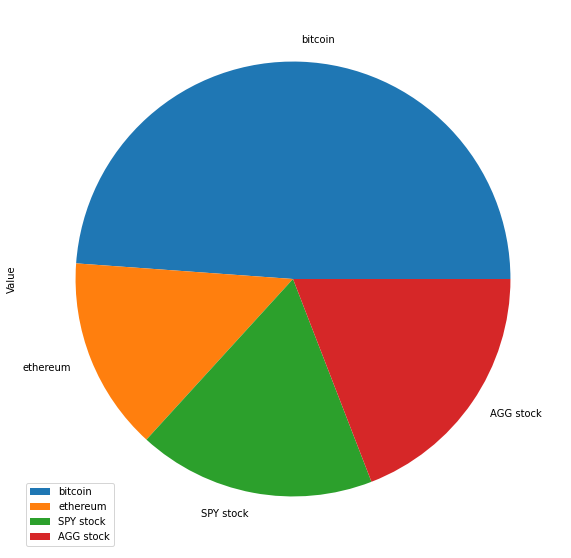

In [50]:
# Plot savings pie chart
plt.show(
    df_savings.plot.pie(y='Value', figsize=(10,10))
)


In [51]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['Value'].sum()

# Validate saving health
if total_savings > emergency_fund:
  print(f'Your savings (CAD${total_savings:0,.2f}) exceeds your emergency fund (CAD${emergency_fund:0,.2f}) requirements by CAD${total_savings - emergency_fund:0,.2f}')
else:
  print(f'You need to increase your emergench funds by (CAD${emergency_fund - total_savings:0,.2f})')

Your savings (CAD$120,271.26) exceeds your emergency fund (CAD$36,000.00) requirements by CAD$84,271.26


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [52]:
from datetime import timedelta

In [53]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_mid_date_ts   = pd.Timestamp('2019-05-01', tz='America/New_York')
start_mid_date_ts = end_mid_date_ts + timedelta(days=1)
end_date   = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [54]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_1 = api.get_barset(
    symbols=tickers,
    timeframe=timeframe,
    start=start_date,
    end=end_mid_date_ts.isoformat(),
    limit= 1000
).df
df_2 = api.get_barset(
    symbols=tickers,
    timeframe=timeframe,
    start=start_mid_date_ts.isoformat(),
    end=end_date,
    limit= 1000
).df

df_stock_data = pd.concat(objs=[df_1,df_2], axis='rows', join='inner', sort=True)

# Display sample data
df_stock_data.head()

AGG            ...     SPY          
                             close      high  ...    open    volume
time                                          ...                  
2016-05-02 00:00:00-04:00  110.595  110.7400  ...  206.92  52152807
2016-05-03 00:00:00-04:00  110.820  110.9450  ...  206.52  79397652
2016-05-04 00:00:00-04:00  110.880  110.9315  ...  204.99  73747383
2016-05-05 00:00:00-04:00  111.120  111.1600  ...  205.56  58322810
2016-05-06 00:00:00-04:00  111.000  111.1200  ...  204.06  69458860

[5 rows x 10 columns]

In [55]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 1000
trading_days_per_year = 252

In [56]:
# Printing the simulation input data
MC_AGG_SPY = MCSimulation(
    portfolio_data= df_stock_data,
    num_simulation= num_sims,
    num_trading_days = trading_days_per_year * 30
)

In [57]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_AGG_SPY.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999949,0.987767,1.001164,1.001086,0.997606,1.005366,1.009204,0.997961,1.008770,1.002242,0.997868,0.992285,1.003334,0.991083,0.993414,1.004497,1.011312,0.998892,1.000117,0.994972,1.006672,1.003596,0.990454,0.999212,0.989171,0.998767,1.009335,1.002949,1.006649,1.001933,1.000903,0.990839,0.993094,0.994252,0.985670,0.992916,0.993723,0.997650,1.003418,1.008080,...,1.004906,1.003149,1.007699,0.998760,0.997375,1.006321,0.999473,1.000162,1.011479,1.005903,1.005172,0.998965,0.988365,1.005546,0.991269,0.999755,1.004592,0.994467,0.998043,1.000796,1.001157,1.000287,1.002389,1.001569,1.004181,1.007244,1.007714,1.002853,0.993714,0.994004,1.004006,1.008407,1.001938,0.994871,0.988386,0.999326,1.005873,1.003233,0.992748,1.004454
2,0.995096,0.986983,0.998402,1.010517,1.000161,1.009586,1.014077,0.990688,1.003600,1.006485,0.995931,1.003891,1.013546,0.996429,0.995855,1.005210,1.011710,1.002096,0.999467,0.995650,1.000355,1.001335,1.000928,0.993137,0.987335,0.997458,1.004004,0.998434,1.003887,1.001960,0.999760,0.989539,1.000610,0.998815,0.982604,0.992149,1.000816,1.001085,1.000830,1.011191,...,1.007623,0.997654,1.011721,1.008109,0.996249,1.011892,0.992256,1.003244,1.008762,1.003572,1.008355,0.994966,0.979505,1.001321,0.986022,1.001525,0.992791,1.003827,0.997430,1.006971,0.997571,1.004438,1.000931,1.004185,1.009139,1.016312,1.000703,1.004242,0.985842,0.982812,1.002558,1.000345,0.993023,0.996448,0.987668,1.006036,1.015107,1.008006,0.994301,1.005398
3,0.991490,0.982638,1.007432,1.011475,0.998020,1.006820,1.013186,0.998242,1.007519,1.006761,0.990023,1.006359,1.009003,0.995132,0.996326,1.002424,1.018063,0.999360,1.001408,0.990957,1.002835,1.014137,0.995811,0.993781,0.999771,0.989099,1.013019,0.994249,1.013175,1.004596,1.001231,0.987844,0.997430,0.993717,0.993122,0.997527,0.985809,1.003663,1.006597,1.007593,...,1.013288,0.989141,1.014045,1.004681,1.000233,1.019751,0.990326,0.998901,1.014244,1.008987,1.009063,1.002089,0.982853,0.999983,0.991519,1.007529,0.992195,1.010118,1.008278,1.010293,0.998013,1.009433,0.986066,1.005627,1.009185,1.016088,0.999582,1.004034,0.986018,0.986271,0.988338,0.994872,1.000887,1.009443,0.994898,1.004728,1.010802,0.998427,1.000896,1.017757
4,0.984005,0.975642,1.009630,1.016243,0.997139,1.014349,1.021506,1.002147,1.012385,1.010066,0.985600,1.000361,1.013882,0.988906,0.999241,1.013156,1.025282,1.000757,1.004237,1.001451,1.002251,1.020467,1.005018,0.993664,1.005205,0.993474,1.013101,0.996404,1.011476,0.996038,1.009687,0.984081,1.007834,0.990396,0.994038,0.999245,0.994485,1.012626,1.008514,1.008566,...,1.010344,0.980880,1.020624,0.993137,1.016047,1.029474,0.992567,1.001052,1.020192,1.012873,1.019265,1.006401,0.983695,0.993104,0.992343,1.001766,0.995889,1.012299,1.001406,1.009706,0.999904,1.012140,0.982782,1.006595,1.012862,1.014466,0.992432,1.001625,0.984063,0.979822,0.988227,0.997953,0.997323,1.006914,1.007497,1.005216,1.018265,0.979966,1.012790,1.013804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

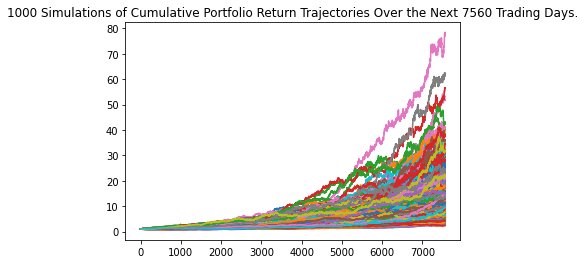

In [69]:
# Plot simulation outcomes
plt.show(MC_AGG_SPY.plot_simulation())

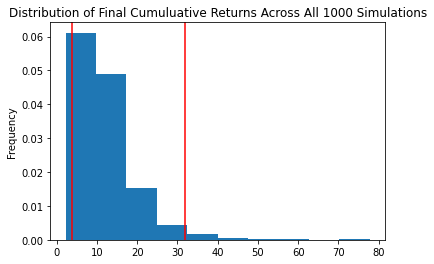

In [70]:
# Plot probability distribution and confidence intervals
plt.show(MC_AGG_SPY.plot_distribution())

### Retirement Analysis

In [60]:
# Fetch summary statistics from the Monte Carlo simulation results
statics_summ = MC_AGG_SPY.summarize_cumulative_return()

# Print summary statistics
print(statics_summ)

count           1000.000000
mean              12.117313
std                7.456869
min                2.236966
25%                7.079389
50%               10.323328
75%               14.964098
max               77.804708
95% CI Lower       3.954545
95% CI Upper      31.780839
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [73]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = statics_summ[8] * initial_investment
ci_upper = statics_summ[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of CAD${initial_investment:0,.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" CAD${ci_lower:0,.2f} and CAD${ci_upper:0,.2f}")

There is a 95% chance that an initial investment of CAD$20,000.00 in the portfolio over the next 30 years will end within in the range of CAD$79,090.90 and CAD$635,616.78


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [74]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = statics_summ[8] * initial_investment
ci_upper = statics_summ[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of CAD${initial_investment:0,.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" CAD${ci_lower:0,.2f} and CAD${ci_upper:0,.2f}")

There is a 95% chance that an initial investment of CAD$30,000.00 in the portfolio over the next 30 years will end within in the range of CAD$118,636.34 and CAD$953,425.17


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [63]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_AGG_SPY_5_yrs = MCSimulation(
    portfolio_data= df_stock_data,
    num_simulation= num_sims,
    num_trading_days = trading_days_per_year * 5
)

In [64]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_AGG_SPY_5_yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002352,0.997477,0.997593,1.001742,1.013159,0.998460,1.004503,0.994818,1.011073,0.996337,0.999152,1.008558,1.004660,0.996637,0.999016,1.001742,1.003172,1.004641,1.001477,1.009194,1.001135,0.993060,0.999997,1.003302,1.007389,1.000271,1.000475,1.005283,1.004417,1.006458,0.991617,0.999169,0.997580,1.000352,1.000347,1.000335,1.004724,0.995436,0.999934,0.999691,...,0.998913,0.999758,0.995798,0.992333,0.997150,0.985112,1.007407,0.998549,0.993334,1.008913,0.989546,1.002060,0.997823,1.002765,1.002745,0.996756,1.005147,1.002678,0.997260,1.004226,0.993937,0.999090,0.994720,0.994879,1.008692,0.995046,0.993951,1.006434,0.996304,1.017323,0.990592,1.002908,0.999170,1.008978,0.993496,0.993223,0.999651,1.005103,0.991971,0.991157
2,1.004288,1.007604,1.008100,1.003855,1.010094,0.994077,1.005418,1.004973,1.004683,0.986979,1.001423,1.005953,1.010114,1.012397,1.001963,1.000154,1.005613,0.997748,1.000203,1.007542,1.005494,1.002738,1.005696,0.999456,1.016319,1.001296,1.017059,1.009691,1.013850,1.016627,1.002481,1.000807,0.998562,1.001399,1.003937,0.997715,1.002558,0.998493,1.002940,0.999581,...,1.001549,1.013256,1.001111,0.991215,1.004368,0.979147,1.003661,1.006034,0.995718,1.002335,0.988397,1.000901,1.008190,1.007615,1.003898,0.995633,1.009834,1.000930,1.006577,1.000915,1.000784,0.997215,0.995933,1.008107,1.015106,0.992985,0.992424,1.005965,0.999014,1.004176,0.990993,0.996000,1.000806,1.014289,0.989985,0.990610,1.003801,1.000586,0.990292,0.995186
3,1.000926,1.016438,1.004242,1.003625,1.006911,0.999448,1.008839,1.007467,1.006582,0.994238,0.998084,1.008213,1.010739,1.016931,1.005750,0.997626,0.999008,1.000593,0.999816,0.999660,1.007094,1.002868,1.010345,0.994929,1.026150,0.992695,1.009510,1.013738,1.004399,1.016078,1.003733,0.999488,0.999866,1.011980,0.994769,0.998206,1.013153,0.998366,1.007501,0.995058,...,1.015405,1.012626,1.007247,0.980075,1.000017,0.970760,1.015476,1.019199,0.999677,0.996167,0.990131,0.995900,0.999466,1.008781,1.003097,1.005566,1.022161,1.007247,1.017192,1.011640,1.003026,0.999979,1.004035,1.004754,1.016512,0.992815,0.993375,0.997800,0.991108,1.006572,0.982818,0.996763,0.999931,1.006339,0.990457,0.987459,1.006460,1.004473,0.996536,0.999209
4,1.012483,1.016788,0.997044,1.012605,1.003544,0.994784,1.014056,1.010832,1.003461,1.006908,0.988971,1.015603,1.012589,1.019660,1.002369,0.996282,1.000314,0.999378,0.991176,0.992665,1.009032,1.001063,1.000006,0.998944,1.023199,0.989808,1.013177,1.014740,0.996616,1.014162,0.991931,1.013859,1.001790,1.011687,0.998787,1.004687,1.013634,0.995308,1.011693,0.994367,...,1.018634,1.012783,1.011381,0.980737,0.998648,0.971009,1.010410,1.027628,1.008711,0.991848,0.990863,0.993590,1.001590,1.020041,1.005727,1.003289,1.018363,1.011872,1.016288,1.004313,0.993596,1.010824,0.997137,1.003365,1.014220,0.988715,0.996230,1.000612,0.989419,1.010880,0.973481,0.989118,0.997115,1.013347,0.992124,0.990923,1.011767,0.999823,1.001590,1.005450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

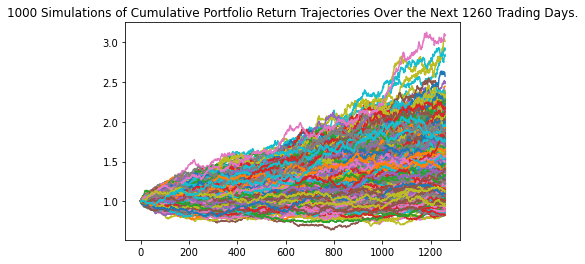

In [75]:
# Plot simulation outcomes
plt.show(MC_AGG_SPY_5_yrs.plot_simulation())

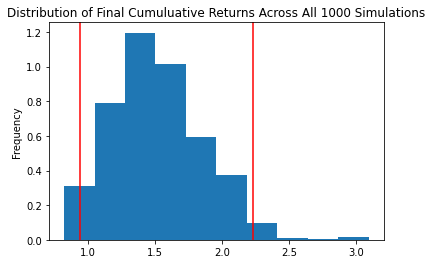

In [76]:
# Plot probability distribution and confidence intervals
plt.show(MC_AGG_SPY_5_yrs.plot_distribution())

In [82]:
# Fetch summary statistics from the Monte Carlo simulation results
statistics_summ_5_yrs = MC_AGG_SPY_5_yrs.summarize_cumulative_return()

# Print summary statistics
print(statistics_summ_5_yrs)

count           1000.000000
mean               1.518189
std                0.340989
min                0.824399
25%                1.277978
50%                1.487235
75%                1.728922
max                3.090908
95% CI Lower       0.943920
95% CI Upper       2.230364
Name: 1260, dtype: float64


In [84]:
# Set initial investment
initial_investment = 60_000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = statistics_summ_5_yrs[8] * initial_investment
ci_upper_five = statistics_summ_5_yrs[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of CAD${initial_investment:0,.2f} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five:0,.2f} and ${ci_upper_five:0,.2f}")

There is a 95% chance that an initial investment of CAD$60,000.00 in the portfolio over the next 5 years will end within in the range of $56,635.20 and $133,821.86


### Ten Years Retirement Option

In [86]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_AGG_SPY_10_yrs = MCSimulation(
    portfolio_data= df_stock_data,
    num_simulation= num_sims,
    num_trading_days = trading_days_per_year * 10
)

In [87]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_AGG_SPY_10_yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998075,0.998293,1.002163,0.998300,0.997308,0.998570,0.994886,1.000149,1.002489,0.996372,0.998136,0.995733,0.999818,0.996077,0.998617,1.001544,0.989947,1.007479,1.002347,0.994179,1.002155,0.994895,1.001362,1.004188,0.992516,1.005945,0.996663,1.003842,1.003597,0.989500,0.992504,1.005397,0.999541,0.985072,0.996963,1.001454,0.998046,1.001480,1.002231,1.006077,...,1.012458,1.003992,0.992189,1.002387,0.990359,1.003831,0.997741,1.000905,0.993395,1.000808,0.987588,0.995688,1.012262,1.007140,0.994650,0.999519,0.989141,0.998981,1.003910,1.001788,0.999354,1.003445,1.000514,0.988832,1.005612,0.997716,0.996350,0.992000,0.999634,0.999537,1.012930,1.009424,0.992516,0.997443,0.989911,0.982854,1.004440,0.998629,0.997008,0.995597
2,0.993637,0.993616,0.996258,0.993127,0.999155,0.998304,0.995827,0.994520,1.004099,1.000390,0.999141,0.982682,0.998442,1.001642,0.991147,0.995986,0.986429,1.009831,0.994321,0.997693,1.000127,0.998319,0.995164,1.002069,0.991110,0.998101,0.991968,1.004914,0.994945,0.995588,0.994941,1.001416,1.009502,0.976481,0.993894,0.990119,0.996159,1.006420,0.999157,1.007614,...,1.013015,0.992295,0.994213,1.004438,0.994815,1.001128,1.003049,0.993791,0.986995,1.000859,0.986746,0.995696,1.017700,1.011557,0.995800,1.006349,0.998905,1.000277,1.013592,1.004352,0.996125,1.004046,0.998133,0.984114,1.015414,1.000027,1.002311,0.993645,0.989010,0.994657,1.018001,0.999702,0.989645,1.005815,0.998690,0.987447,1.006038,0.997811,0.991588,0.999496
3,0.986944,0.991760,0.989509,0.991445,0.985624,1.001791,0.990539,0.999091,1.011191,1.004908,1.000818,0.979332,0.990427,0.990913,0.991747,0.990002,0.981481,1.022535,0.983403,1.006880,1.010040,1.004150,0.989350,1.002472,0.991611,0.991591,0.995063,0.996779,0.991039,0.997130,0.994382,1.005775,1.014459,0.965985,0.996061,0.999993,0.997748,1.003418,0.996445,1.009620,...,1.008883,0.996408,0.996105,1.007745,1.000205,1.007417,1.011980,0.986084,0.988832,1.003525,1.001515,0.993836,1.009799,1.006733,0.997724,1.008663,1.001359,0.996264,1.015974,0.999066,1.004707,0.989723,0.994300,0.983422,1.026093,0.992394,1.002335,0.990984,0.995207,0.994535,1.014633,0.991033,0.996304,1.004739,1.009789,0.999616,1.008875,0.998597,0.992943,0.996148
4,0.989264,0.977954,0.993052,0.991529,1.002727,1.011463,0.992076,0.993854,1.011763,0.992157,1.007461,0.966549,0.997509,0.986308,0.995516,0.991459,0.985562,1.027348,0.982513,1.014414,1.008654,1.010216,0.994956,1.009904,0.993061,0.978811,1.000261,0.998875,0.987548,0.996863,1.002575,1.007807,1.001382,0.956975,1.002746,0.992003,0.993804,1.004301,0.986615,1.005045,...,1.007498,1.002658,0.993002,1.005647,0.999132,1.001340,1.015104,0.989090,0.986328,1.008357,1.002003,0.986983,1.003806,1.018054,1.001776,1.018891,1.002722,0.995120,1.017858,1.000836,0.993224,1.003270,0.999116,0.977941,1.021370,0.997025,0.997807,0.985962,0.995768,0.995429,1.012749,0.980638,1.001450,1.013202,1.009749,0.991620,1.014634,1.002103,0.979668,1.003932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

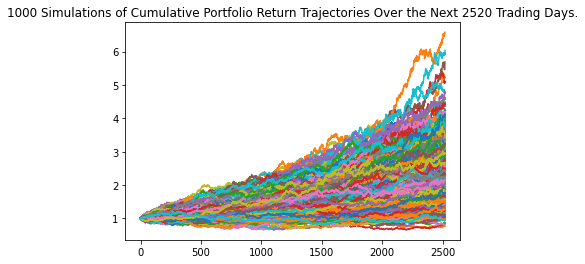

In [93]:
# Plot simulation outcomes
plt.show(MC_AGG_SPY_10_yrs.plot_simulation())

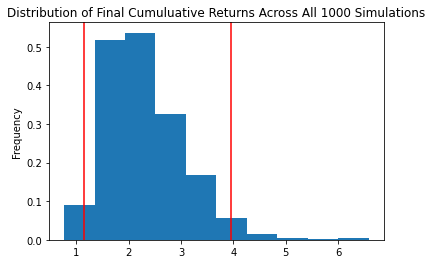

In [94]:
# Plot probability distribution and confidence intervals
plt.show(MC_AGG_SPY_10_yrs.plot_distribution())

In [92]:
# Fetch summary statistics from the Monte Carlo simulation results
statistics_summ_10_yrs = MC_AGG_SPY_10_yrs.summarize_cumulative_return()

# Print summary statistics
print(statistics_summ_10_yrs)

count           1000.000000
mean               2.296637
std                0.740100
min                0.768895
25%                1.781210
50%                2.171230
75%                2.731462
max                6.581758
95% CI Lower       1.146770
95% CI Upper       3.953247
Name: 2520, dtype: float64


In [97]:
# Set initial investment
initial_investment = 60_000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = statistics_summ_10_yrs[8] * initial_investment
ci_upper_ten = statistics_summ_10_yrs[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of CAD${initial_investment:0,.2f} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" CAD${ci_lower_ten:0,.2f} and CAD${ci_upper_ten:0,.2f}")

There is a 95% chance that an initial investment of CAD$60,000.00 in the portfolio over the next 10 years will end within in the range of CAD$68,806.19 and CAD$237,194.84
